### Aspettativa di vita nei vari paesi (anno 2007)
Si analizza il dataset fornito in modo da:
- Analizzare differenze geografiche e economiche nell'aspettativa di vita;
- Individuare i principali fattori che influenzano l'aspettativa di vita;
- Predire l'aspettativa di vita basandosi su fattori socioeconomici e sanitari.

Fonte: [kaggle.com](https://www.kaggle.com/datasets/shreyasg23/life-expectancy-averaged-dataset)

#### Import delle librerie necessarie

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Import dataset

**Country**: Nome del paese.\
**Region**: Regione geografica del paese.\
**Year**: Anno dei dati (media o interpolato).\
**Infant_deaths**: Numero di decessi infantili ogni 1000 nati vivi.\
**Under_five_deaths**: Numero di decessi di bambini sotto i cinque anni ogni 1000 nati vivi.\
**Adult_mortality**: Tasso di mortalità degli adulti ogni 1000 abitanti.\
**Alcohol_consumption**: Consumo pro capite di alcol in litri.\
**Hepatitis_B**: Percentuale di copertura vaccinale per l'epatite B.\
**Measles**: Numero di casi di morbillo segnalati.\
**BMI**: Indice di massa corporea medio della popolazione.\
**Polio**: Percentuale di copertura vaccinale per la poliomielite.\
**Diphtheria**: Percentuale di copertura vaccinale per la difterite.\
**Incidents_HIV**: Numero di nuove infezioni da HIV ogni 1000 abitanti non infetti.\
**GDP_per_capita**: Prodotto interno lordo pro capite in USD.\
**Population_mln**: Dimensione della popolazione in milioni.\
**Thinness_ten_nineteen_years**: Prevalenza della magrezza (BMI < 18,5) tra gli adolescenti di età compresa tra 10 e 19 anni.\
**Thinness_five_nine_years**: Prevalenza della magrezza (BMI < 18,5) tra i bambini tra 5 e 9 anni.\
**Schooling**: Anni medi di scolarizzazione.\
**Economy_status**: Classificazione economica del paese (ad esempio, in via di sviluppo o sviluppato).\
**Life_expectancy**: Aspettativa media di vita in anni.

In [52]:
df = pd.read_csv("Life-Expectancy-Data-Averaged.csv")

### Esplorazione del contenuto

In [42]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      179 non-null    object 
 1   Region                       179 non-null    object 
 2   Year                         179 non-null    float64
 3   Infant_deaths                179 non-null    float64
 4   Under_five_deaths            179 non-null    float64
 5   Adult_mortality              179 non-null    float64
 6   Alcohol_consumption          179 non-null    float64
 7   Hepatitis_B                  179 non-null    float64
 8   Measles                      179 non-null    float64
 9   BMI                          179 non-null    float64
 10  Polio                        179 non-null    float64
 11  Diphtheria                   179 non-null    float64
 12  Incidents_HIV                179 non-null    float64
 13  GDP_per_capita      

In [44]:
# Controllo dei valori nulli
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status                 0
Life_expectancy                0
dtype: int64

In [53]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
count,179.0,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2007.5,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.793296,68.856075
std,0.0,26.725485,42.916952,111.659044,3.914554,13.820223,17.315208,2.165490,13.581153,13.931532,2.311895,16893.054182,136.655286,4.111094,4.195663,3.126912,0.406077,9.197699
min,2007.5,2.381250,3.000000,57.710313,0.000025,30.687500,16.250000,20.212500,35.750000,31.312500,0.010000,263.937500,0.085000,0.100000,0.100000,1.337500,0.000000,45.606250
25%,2007.5,8.159375,9.775000,107.046906,1.317813,78.218750,64.000000,23.225000,80.531250,80.812500,0.080000,1409.906250,2.108125,1.756250,1.731250,4.946875,1.000000,62.303125
50%,2007.5,19.368750,23.137500,164.432406,4.209375,88.000000,83.000000,25.650000,92.375000,92.062500,0.164375,4402.625000,7.660625,3.556250,3.718750,7.831250,1.000000,71.506250
75%,2007.5,48.959375,68.321875,247.523922,7.843438,94.375000,92.250000,26.425000,96.062500,95.781250,0.516250,12037.781250,22.745313,7.165625,7.056250,10.365625,1.000000,74.937500
max,2007.5,115.718750,178.725000,572.974312,15.100000,98.875000,99.000000,31.687500,98.937500,99.000000,18.164375,102972.687500,1321.239375,27.100000,27.943750,13.268750,1.000000,82.456250


### Trasformazione dei dati

In [54]:
df['Year'].nunique()

1

In [55]:
# Elimino la colonna del anno dato che è uguale per tutti
# Anno di riferimento 2007
df = df.drop(columns=['Year'])

In [58]:
# Trasformo la colonna 'Country' in indice
df = df.set_index('Country')

In [61]:
# Arrotondamento del BMI e Schooling a 2 cifre decimali per semplicità
df['BMI'] = df['BMI'].round(2)
df['Schooling'] = df['Schooling'].round(2)

In [62]:
# Arrotondamento del Life_expectancy a 1 cifra decimale
df['Life_expectancy'] = df['Life_expectancy'].round(1)

In [69]:
df['Economy_status'].unique()

array([1., 0.])

In [68]:
df[df['Economy_status']!=1.0].head()

,Region,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
Country,,,,,,,,,,,,,,,,,,
Australia,Oceania,4.31250,5.15625,65.958594,10.145625,93.5000,87.2500,26.75,91.8125,91.9375,0.046875,51750.9375,21.289375,0.66875,0.62500,12.19,0.0,81.1
Austria,European Union,3.81250,4.60000,78.310500,12.226875,81.0625,60.9375,25.29,86.0000,86.7500,0.080000,42376.0000,8.295625,1.73125,1.93750,10.83,0.0,80.0
Belgium,European Union,3.90000,4.75625,85.439688,10.986875,84.6250,80.9375,25.82,97.7500,97.3125,0.080000,38782.0000,10.720625,0.86250,0.85625,10.91,0.0,79.6
Bulgaria,European Union,10.22500,12.28750,148.022656,10.510000,94.5000,90.4375,25.81,94.2500,94.0000,0.025000,5701.8750,7.561875,2.13125,2.15625,10.47,0.0,73.2
Canada,North America,5.06875,5.87500,72.634969,8.056250,33.9375,84.6875,26.69,91.2500,91.0625,0.100000,39683.6250,33.156250,0.50625,0.43750,12.27,0.0,80.6


In [70]:
# Trasformo i valori della colonna 'Economy_status' da float ad int
# 0 --> Paesi sviluppati, 1 --> in via di sviluppo
df['Economy_status'] = df['Economy_status'].astype(int)

### Correlazione tra diversi features

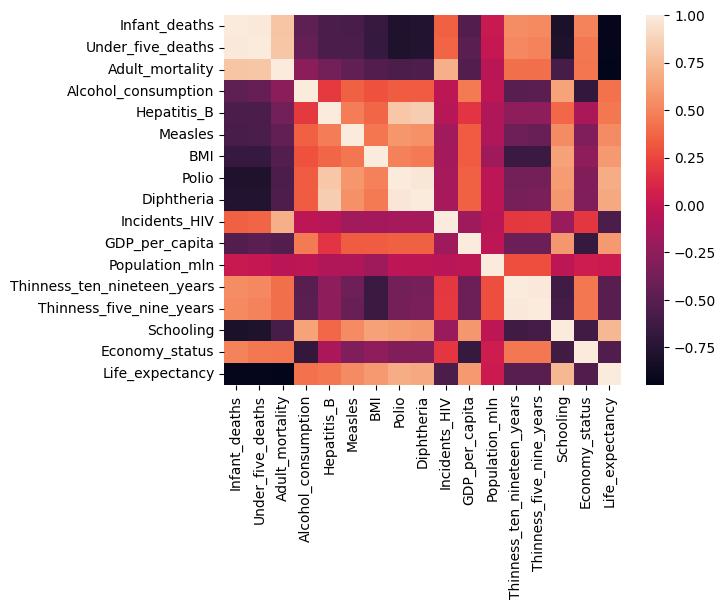

In [83]:
# Include solo valori numerici, senza 'Region'
df_numerico = df.select_dtypes(include=['number'])

# Crea la heatmap
sns.heatmap(df_numerico.corr())

# Mostra la heatmap
plt.show()

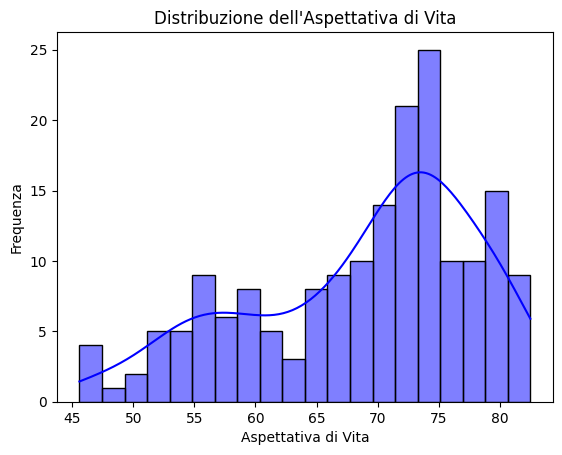

In [91]:
sns.histplot(data=df, x='Life_expectancy', kde=True, bins=20, color='blue')

plt.title('Distribuzione dell\'Aspettativa di Vita')
plt.xlabel('Aspettativa di Vita')
plt.ylabel('Frequenza')
plt.show()